## Installing Qiskit Libraries

In [ ]:
!pip install qiskit
!pip install qiskit-machine-learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 13.0 MB/s 
     |████████████████████████████████| 19.2 MB 357 kB/s 
     |████████████████████████████████| 240 kB 66.5 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 106 kB 65.2 MB/s 
     |████████████████████████████████| 37.5 MB 24 kB/s 
     |████████████████████████████████| 943 kB 67.6 MB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 4.0 MB 60.1 MB/s 
     |████████████████████████████████| 1.9 MB 74.2 MB/s 
     |████████████████████████████████| 112 kB 83.4 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.0-py3-none-any.whl size=12188 sha256=7d5edc4706aaeea4e925042f70bbf149252f91cbf8b206cbb6f0238fe4046826
  Stored in directory: /root/.cache/pip/wheels/63/d0/9a/25714

## Importng Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import qiskit
from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap, ZFeatureMap
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit.providers.aer.noise import NoiseModel,QuantumError,amplitude_damping_error,depolarizing_error, coherent_unitary_error,pauli_error
from qiskit.utils.mitigation import complete_meas_cal, CompleteMeasFitter,TensoredMeasFitter

In [ ]:
def plot_decision_boundary(kernel):
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02
    plt.figure(figsize=(15, 6))

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target
        # Train
        clf = SVC(kernel=kernel).fit(X, y)
        
        # Plot the decision boundary
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                            np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=2, w_pad=2, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(3), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of a support vector machine with "+kernel+" kernel using paired features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")

## Data Load and Visualization

> Load the Dataset


> Split the dataset in Train and Test data


> Plot the Training data

In [ ]:
#Load the Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

#Split the the as 80% Training data and 20% Testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

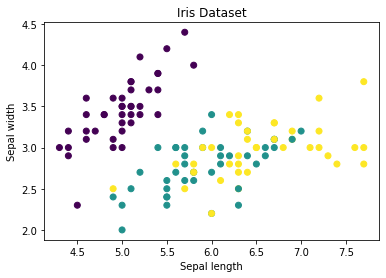

In [ ]:
#Plotting the train dataset with respect to Sepal length and sepal width and color all the points based on their labels
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

#Provide the plot title, x-axis name and y-axis name
plt.title("Iris Dataset")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

#Visualize the plot
plt.show()

# **Classical Machine Learning**

Support Vector Machine (SVM): SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. The best decision boundary is called a hyperplane.

Kernel: It returns the inner product between two points in a standard feature dimension.

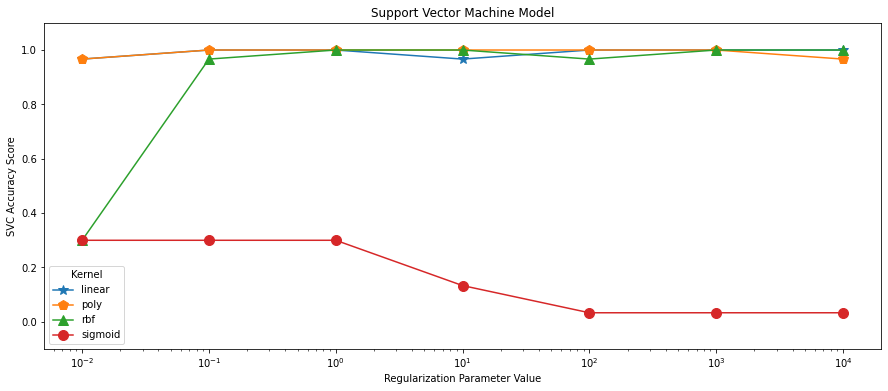

In [ ]:
# Define Regularization parameters, kernels and markers
C_list = [10**i for i in range(-2, 5)]
kernels= ['linear', 'poly', 'rbf', 'sigmoid']
markers= ['*', 's', '^', 'o']

# Store the accuracy score of each model
scores = []

# For each kernels
for k in kernels:
    temp=[]
    
    # For each regularization parameter
    for C in C_list:
        
        # Initialize the Support Vector Machine Classifier with parameters
        model=SVC(C=C,kernel=k)

        # Fit the training dataset in model
        model.fit(X_train,y_train)

        # Predict the labels in test dataset in model
        y_pred = model.predict(X_test)

        #Calculate the score and store it to the list
        temp.append(accuracy_score(y_test, y_pred))
    scores.append(temp)

#Plot the Support Vector Machine Classifier Model for each regularization parameter and kernel
plt.figure(figsize=(15, 6))
for i in range(len(kernels)):
    plt.plot(C_list, scores[i], label=kernels[i], marker=markers[i], markersize=10)
plt.axis(ymin=-0.1, ymax=1.1)
plt.xscale("log")
plt.legend(title = "Kernel")
plt.title("Support Vector Machine Model")
plt.xlabel("Regularization Parameter Value")
plt.ylabel("SVC Accuracy Score")
plt.show()

Linear Kernel


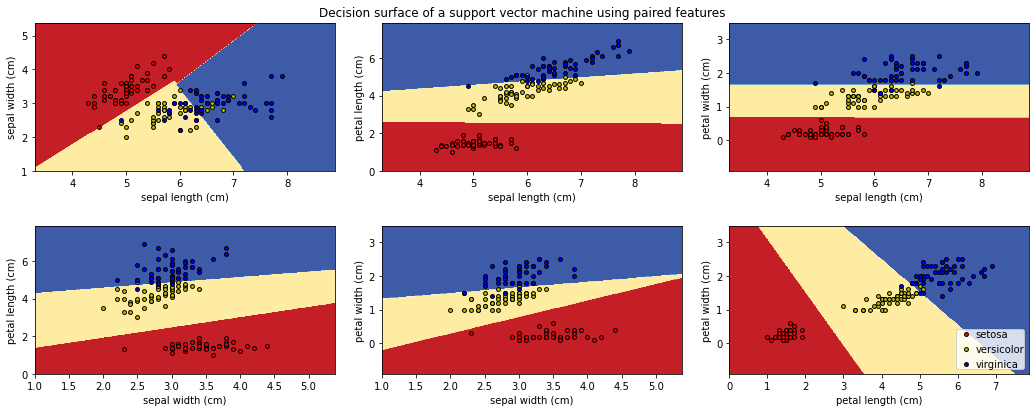

In [ ]:
print('Linear Kernel')
plot_decision_boundary('linear')

RBF Kernel


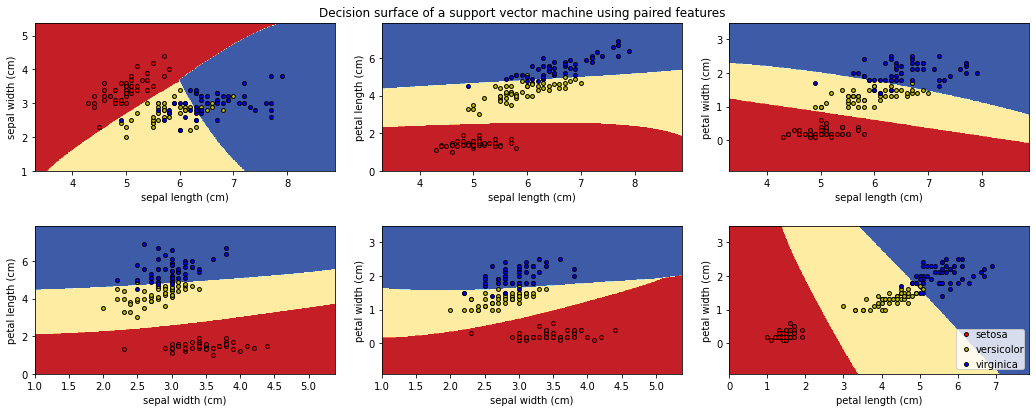

In [ ]:
print('RBF Kernel')
plot_decision_boundary('rbf')

Polynomial Kernel


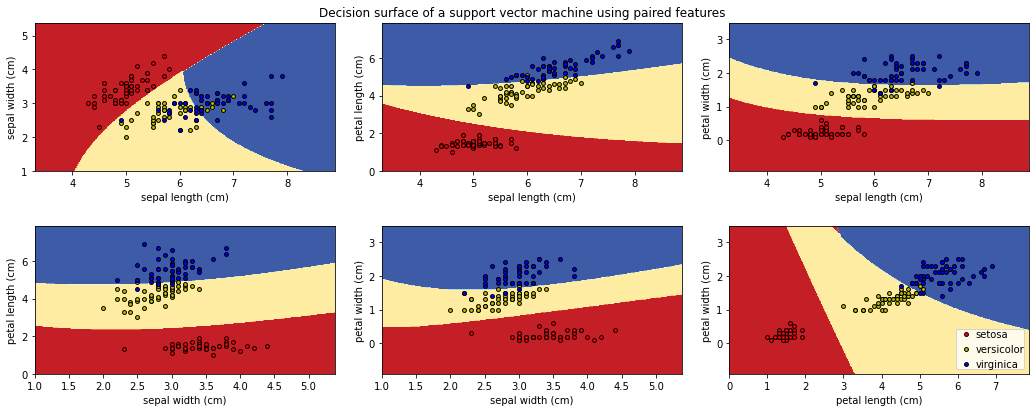

In [ ]:
print('Polynomial Kernel')
plot_decision_boundary('poly')

# **Quantum Machine Learning**

> Feature Map: Encoding classical data into quantum states is considered a quantum feature map to map classical data into a quantum Hilbert space. We have 3-types of Feature Maps, ZZFeatureMap, ZFeatureMap and PauliFeatureMap.

> Entanglement: Entanglement uses two-qubit gates to entangle the qubits according to a strategy set provided by user. For this purpose, we use 3 types of Entanglement: Full , Linear and Circular.

*   Full entanglement is each qubit is entangled with all the others.
*   Linear entanglement is one qubit entangled with it's next qubit.
*   Circular entanglement is linear entanglement with an additional entanglement of the first and last qubit before the linear part.

> Quantum Kernel: The quantum kernel algorithm calculates a kernel matrix, given datapoints and feature map with all of dimensions. So it encodes the given datapoint to high encoding quantum state using Feature Map, then it calculates the kernel matrix with the provided hardware or simulator.





> For each Feature Map, Entanglement and Repititions we generate the Data Encoding followed by creating Quantum Kernel with QASM-Simulator for train SVC Model with the train dataset, calculate the accuracy on test dataset and store corresponding accuracy for analysis.

> We visualize the accuracy of each model for analysis, and understand the impacts of number of repitations, entanglements in SVC Model further and conclude the best model for this train dataset.

In [ ]:
#Take the repititions from 1-4
reps=[i for i in range(1,5)]

#Take the different Feature Maps with entanglements
feature_maps=[ZZFeatureMap, PauliFeatureMap]

#Take the disserent entanglements
entanglements=["linear", "circular", "full"]

#Store Accurecies of each model
zz_set=[]
pauli_set=[]
z_set=[]

#For each feature map, entanglement and repititions 
for fm in feature_maps:
    for entanglement in entanglements:
        temp=[]
        
        for rep in reps:

            #Create the feature map, considering all the dimensions of the dataset, which is 4, and provided repitition and entanglement
            feature_map = fm(feature_dimension=4, reps=rep, entanglement=entanglement)

            #Create the qasm-simulator qunatum instance as backend with 1024 shots to perform the quantum kernel algorithm 
            backend = QuantumInstance(BasicAer.get_backend("qasm_simulator"), shots=1024)

            #Construct the Quantum Kernel based on the feature map and defined backend
            kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

            #Define the Support vector machine with the Quantum Kernel Matrix
            svc = SVC(kernel=kernel.evaluate)

            #Fit the training data
            svc.fit(X_train, y_train)

            #Predict the model based on the test data and calculate accuracy
            svc_score=accuracy_score(y_test, svc.predict(X_test))
            temp.append(svc_score)
        
        #Store the accuracy value in corresponding to the feature map
        if fm==ZZFeatureMap:
            zz_set.append(temp)
        else:
            pauli_set.append(temp)

#ZFeatureMap Implementation, construct Quantum Kernel based on it, train the SVC Model and store the accuracy.         
for rep in reps:
    feature_map = ZFeatureMap(feature_dimension=4, reps=rep)
    backend = QuantumInstance(BasicAer.get_backend("qasm_simulator"), shots=1024)
    kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

    svc = SVC(kernel=kernel.evaluate)
    svc.fit(X_train, y_train)
    svc_score=accuracy_score(y_test, svc.predict(X_test))
    z_set.append(svc_score)



#### Plot each model performance with number of entanglements, feature maps and repitions for visualization and analysis

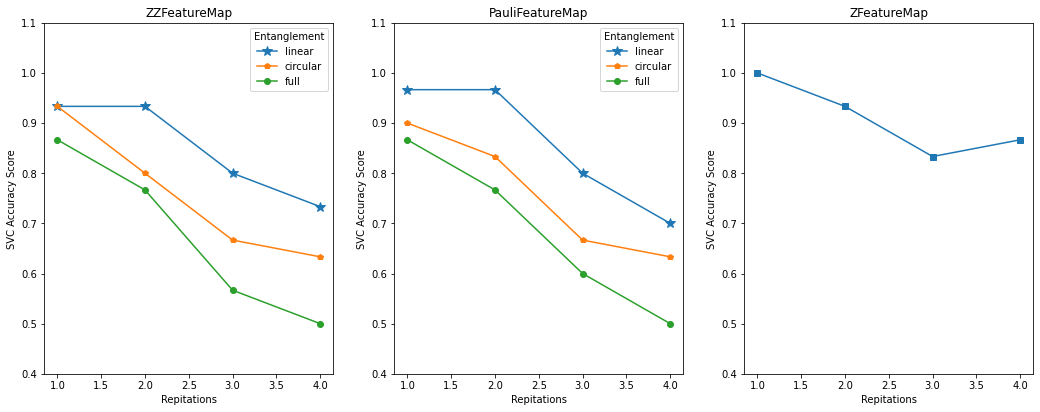

In [ ]:
#Create Plot Structure
fig, axs = plt.subplots(1,3, figsize=(15, 6))
fig.tight_layout(pad=3)

#Plotting ZZFeatureMap Accuracy Scores w.r.t repititions with different entanglements
axs[0].plot(reps, zz_set[0], label="linear", marker="*", markersize=10)
axs[0].plot(reps, zz_set[1], label="circular", marker="p")
axs[0].plot(reps, zz_set[2], label="full", marker="o")
axs[0].axis(ymin=0.4, ymax=1.1)
axs[0].legend(title = "Entanglement")
axs[0].set(title="ZZFeatureMap", xlabel="Repitations", ylabel="SVC Accuracy Score")

#Plotting PauliFeatureMap Accuracy Scores w.r.t repititions with different entanglements
axs[1].plot(reps, pauli_set[0], label="linear" , marker="*", markersize=10)
axs[1].plot(reps, pauli_set[1], label="circular" , marker="p")
axs[1].plot(reps, pauli_set[2], label="full", marker="o")
axs[1].axis(ymin=0.4, ymax=1.1)
axs[1].legend(title = "Entanglement")
axs[1].set(title="PauliFeatureMap", xlabel="Repitations", ylabel="SVC Accuracy Score")

#Plotting ZFeatureMap Accuracy Scores w.r.t repitition
axs[2].plot(reps, z_set, marker="s")
axs[2].axis(ymin=0.4, ymax=1.1)
axs[2].set(title="ZFeatureMap", xlabel="Repitations", ylabel="SVC Accuracy Score")

plt.show()

#### Conclusion: From this visualization, we can conclude that ZFeatureMap with repetition 1 has highest accuracy (1.0) from others, also we can see increasing number of repetitions can impact our dataset and model poorly. Also, ZFeatureMap performs better compare to PauliFeatureMap and ZZFeatureMap for our dataset and model.


In [ ]:
feature_map = ZFeatureMap(feature_dimension=4, reps=1)
backend = QuantumInstance(BasicAer.get_backend("qasm_simulator"), shots=1024)
kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

svc = SVC(kernel=kernel.evaluate)
svc.fit(X_train, y_train)
svc_score=accuracy_score(y_test, svc.predict(X_test))
print("Accuracy Score from ZFeatureMap with 1 repitition is: ", svc_score)

Accuracy Score from ZFeatureMap with 1 repitition is:  1.0


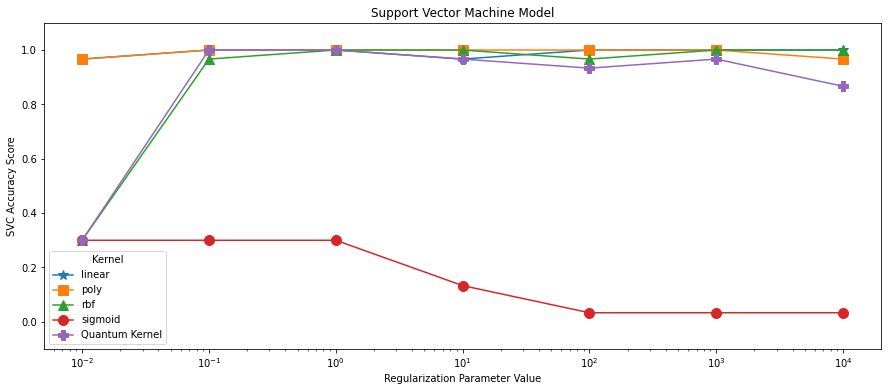

In [ ]:
feature_map = ZFeatureMap(feature_dimension=4, reps=1)
backend = QuantumInstance(BasicAer.get_backend("qasm_simulator"), shots=1024)
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend).evaluate

# Define Regularization parameters, kernels and markers
C_list = [10**i for i in range(-2, 5)]
kernels= ['linear', 'poly', 'rbf', 'sigmoid', quantum_kernel]
markers= ['*', 's', '^', 'o', 'P']

# Store the accuracy score of each model
scores = []

# For each kernels
for k in kernels:
    temp=[]
    
    # For each regularization parameter
    for C in C_list:
        
        # Initialize the Support Vector Machine Classifier with parameters
        model=SVC(C=C,kernel=k)

        # Fit the training dataset in model
        model.fit(X_train,y_train)

        # Predict the labels in test dataset in model
        y_pred = model.predict(X_test)

        #Calculate the score and store it to the list
        temp.append(accuracy_score(y_test, y_pred))
    scores.append(temp)

#Plot the Support Vector Machine Classifier Model for each regularization parameter and kernel
plt.figure(figsize=(15, 6))
for i in range(len(kernels)):
    if kernels[i]==quantum_kernel:
        plt.plot(C_list, scores[i], label='Quantum Kernel', marker=markers[i], markersize=10)
    else:
        plt.plot(C_list, scores[i], label=kernels[i], marker=markers[i], markersize=10)
plt.axis(ymin=-0.1, ymax=1.1)
plt.xscale("log")
plt.legend(title = "Kernel")
plt.title("Support Vector Machine Model")
plt.xlabel("Regularization Parameter Value")
plt.ylabel("SVC Accuracy Score")
plt.show()

# **Quantum Noise**

##DEPOLARIZING ERROR
This is a type of incoherent error.In the below code we are varying the depolarizing probability of single qubit gate and plotting i against the accuracy of the quantum svm to test the accuracy in presence of noise model


In [ ]:
# Error probabilities
list_score=[]
list_prob=[]
for i in np.arange(0.0,1.0,0.1):
    prob_1=i # 1-qubit gate
    list_prob.append(prob_1)
    
    #defining noise model (depolarising error)
    depolarizing_noise_model = NoiseModel()
    
    # Depolarizing quantum errors
    error_1 = depolarizing_error(prob_1, 1)
    
    # Add errors to noise model
    depolarizing_noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
    
    # Get basis gates from noise model
    basis_gates = depolarizing_noise_model.basis_gates
    feature_map=ZFeatureMap(feature_dimension=4, reps=1)
    backend = QuantumInstance(qiskit.Aer.get_backend("qasm_simulator"), shots=1024,basis_gates=basis_gates, noise_model=depolarizing_noise_model)
    
    #simulation of depolarising noise model
    kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
    svc = SVC(kernel=kernel.evaluate)
    svc.fit(X_train, y_train)
    svc_score=accuracy_score(y_test, svc.predict(X_test))
    list_score.append(svc_score)

    print(f"Q-SVC classification test score: {svc_score}")
    
print(list_score)
print(list_prob)

Q-SVC classification test score: 1.0
Q-SVC classification test score: 1.0
Q-SVC classification test score: 1.0
Q-SVC classification test score: 1.0
Q-SVC classification test score: 1.0
Q-SVC classification test score: 0.9666666666666667
Q-SVC classification test score: 0.8
Q-SVC classification test score: 0.5666666666666667
Q-SVC classification test score: 0.36666666666666664
Q-SVC classification test score: 0.3
[1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.8, 0.5666666666666667, 0.36666666666666664, 0.3]
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]


##PAULI ERROR ( MEASUREMENT - BASED )
It is also a type of incoherent error. Here we are varying the measuring probability (p_meas) of single qubit and plotting against the quantum svm accuracy score by keeping single qubit gate probability( p_gate1) constant and the reset probability (When resetting a qubit reset to 1 instead of 0 ) (p_reset). Here we considered pauli z matrix as we are considering it for z feature map.

In [ ]:
# defining noise model(pauli error)
#vary p_measure
list_meas=[]
list_scorepauli=[]
# Example error probabilities
p_reset = 0.3
p_gate1=0.5
for j in np.arange(0.0,1.0,0.1):
    p_meas =j
    list_meas.append(p_meas)
    
    # QuantumError objects
    error_reset = pauli_error([('Z', p_reset), ('I', 1 - p_reset)])
    error_meas = pauli_error([('Z',p_meas), ('I', 1 - p_meas)])
    error_gate1 = pauli_error([('Z',p_gate1), ('I', 1 - p_gate1)])
    error_gate2 = error_gate1.tensor(error_gate1)

    # Add errors to noise model
    noise_bit_flip = NoiseModel()
    noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
    noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
    noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
    noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])
    
    #Simulation of pauli error(p_meas)   
    basis_gates = noise_bit_flip.basis_gates
    feature_map=ZFeatureMap(feature_dimension=4, reps=1)
    backend = QuantumInstance(qiskit.Aer.get_backend("qasm_simulator"), shots=1024,basis_gates=basis_gates, noise_model=noise_bit_flip)

    kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
    svc = SVC(kernel=kernel.evaluate)
    svc.fit(X_train, y_train)
    svc_score=accuracy_score(y_test, svc.predict(X_test))
    list_scorepauli.append(svc_score)
    print(f"Q-SVC classification test score: {svc_score}")
print(list_meas)
print(list_scorepauli)


Q-SVC classification test score: 0.3333333333333333
Q-SVC classification test score: 0.23333333333333334
Q-SVC classification test score: 0.36666666666666664
Q-SVC classification test score: 0.26666666666666666
Q-SVC classification test score: 0.3
Q-SVC classification test score: 0.3
Q-SVC classification test score: 0.2
Q-SVC classification test score: 0.3
Q-SVC classification test score: 0.4
Q-SVC classification test score: 0.4
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]
[0.3333333333333333, 0.23333333333333334, 0.36666666666666664, 0.26666666666666666, 0.3, 0.3, 0.2, 0.3, 0.4, 0.4]


##PAULI ERROR (GATE BASED)
It is also a type of incoherent error.Here we are varying the gate probability (p_gate) of single qubit and plotting against the quantum svm accuracy score by keeping single qubit gate probability(p_meas1) constant and the reset probability (When resetting a qubit reset to 1 instead of 0 ) (p_reset1)

In [ ]:
# defining noise model (pauli error) vary p_gate
list_gate=[]
list_scorepauli2=[]
# Example error probabilities
p_reset1 = 0.3
p_meas1=0.5
for q in np.arange(0.0,1.0,0.1):
    p_gate =q
    list_gate.append(p_gate)
   # QuantumError objects
    error_reset1 = pauli_error([('Z', p_reset1), ('I', 1 - p_reset1)])
    error_meas1 = pauli_error([('Z',p_meas1), ('I', 1 - p_meas1)])
    error_gate2 = pauli_error([('Z',p_gate), ('I', 1 - p_gate)])
    error_gate3 = error_gate1.tensor(error_gate2)

    # Add errors to noise model
    noise_bit_flip = NoiseModel()
    noise_bit_flip.add_all_qubit_quantum_error(error_reset1, "reset")
    noise_bit_flip.add_all_qubit_quantum_error(error_meas1, "measure")
    noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["u1", "u2", "u3"])
    noise_bit_flip.add_all_qubit_quantum_error(error_gate3, ["cx"])
    basis_gates = noise_bit_flip.basis_gates
    
    #Simulation of pauli error(P_gate)    
    feature_map=ZFeatureMap(feature_dimension=4, reps=1)
    backend = QuantumInstance(qiskit.Aer.get_backend("qasm_simulator"), shots=1024,basis_gates=basis_gates, noise_model=noise_bit_flip)

    kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
    svc = SVC(kernel=kernel.evaluate)
    svc.fit(X_train, y_train)
    svc_score=accuracy_score(y_test, svc.predict(X_test))
    list_scorepauli2.append(svc_score)
    print(f"Q-SVC classification test score: {svc_score}")
print(list_gate)
print(list_scorepauli2)



Q-SVC classification test score: 1.0
Q-SVC classification test score: 1.0
Q-SVC classification test score: 1.0
Q-SVC classification test score: 0.9333333333333333
Q-SVC classification test score: 0.5333333333333333
Q-SVC classification test score: 0.36666666666666664
Q-SVC classification test score: 0.16666666666666666
Q-SVC classification test score: 0.13333333333333333
Q-SVC classification test score: 0.03333333333333333
Q-SVC classification test score: 0.0
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]
[1.0, 1.0, 1.0, 0.9333333333333333, 0.5333333333333333, 0.36666666666666664, 0.16666666666666666, 0.13333333333333333, 0.03333333333333333, 0.0]


##COHERENT UNITY ERROR MODEL
It is a cohernt error.Coherent noise may creep in our quantum computers as a result of miscalibrations. For example, a rotation of an angle  θ  actually implement a  θ+ϵ  rotation. Below we'll consider the case where the zfeature map that implements a rotation around the  u1 axis by an amount epsilon.
Here we are varying rotation from -epsilon to +epsilon and plotting against the quantum svm accuracy score to test accuracy

In [ ]:
#Coherent unitary error noise model
lst_coherent=[]
lst_rotation=[]


epsilon = np.pi/5 # over rotation amountr
for m in np.arange(-epsilon,epsilon,0.1):
    lst_rotation.append(m)
    coherent_error_model=NoiseModel()
    
    over_rotation=qiskit.circuit.library.U1Gate(m).to_matrix()
    coherent_error_model.add_all_qubit_quantum_error(coherent_unitary_error(over_rotation), 'u1')
    basis_gates = noise_bit_flip.basis_gates
    feature_map=ZFeatureMap(feature_dimension=4, reps=1)
    backend = QuantumInstance(qiskit.Aer.get_backend("qasm_simulator"), shots=1024,basis_gates=basis_gates, noise_model=coherent_error_model)

    kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
    svc = SVC(kernel=kernel.evaluate)
    svc.fit(X_train, y_train)
    svc_score = accuracy_score(y_test, svc.predict(X_test))
    lst_coherent.append(svc_score)

    print(f"Q-SVC classification test score: {svc_score}")
print(lst_rotation)
print(lst_coherent)


Q-SVC classification test score: 0.6333333333333333
Q-SVC classification test score: 0.9
Q-SVC classification test score: 0.9333333333333333
Q-SVC classification test score: 0.9666666666666667
Q-SVC classification test score: 0.9666666666666667
Q-SVC classification test score: 0.9666666666666667
Q-SVC classification test score: 1.0
Q-SVC classification test score: 1.0
Q-SVC classification test score: 1.0
Q-SVC classification test score: 0.9
Q-SVC classification test score: 0.9
Q-SVC classification test score: 0.7666666666666667
Q-SVC classification test score: 0.7333333333333333
[-0.6283185307179586, -0.5283185307179586, -0.42831853071795867, -0.3283185307179587, -0.2283185307179587, -0.12831853071795873, -0.028318530717958756, 0.07168146928204122, 0.1716814692820412, 0.2716814692820412, 0.37168146928204115, 0.471681469282041, 0.5716814692820411]
[0.6333333333333333, 0.9, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9, 0.9, 0.76666666

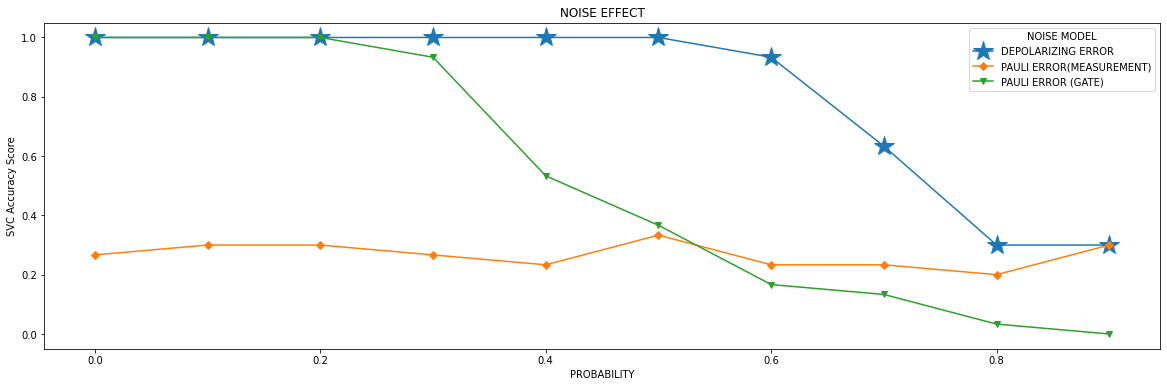

In [ ]:
#plotting of depolarizing,pauli error
plt.figure( figsize=(20, 6))
plt.plot(list_prob,list_score , label="DEPOLARIZING ERROR", marker="*", markersize=20)
plt.plot(list_meas,list_scorepauli, label="PAULI ERROR(MEASUREMENT)", marker="D")
plt.plot(list_gate,list_scorepauli2, label="PAULI ERROR (GATE)", marker="v")

plt.legend(title = "NOISE MODEL")
plt.title("NOISE EFFECT")
plt.xlabel("PROBABILITY")
plt.ylabel("SVC Accuracy Score")
plt.show()

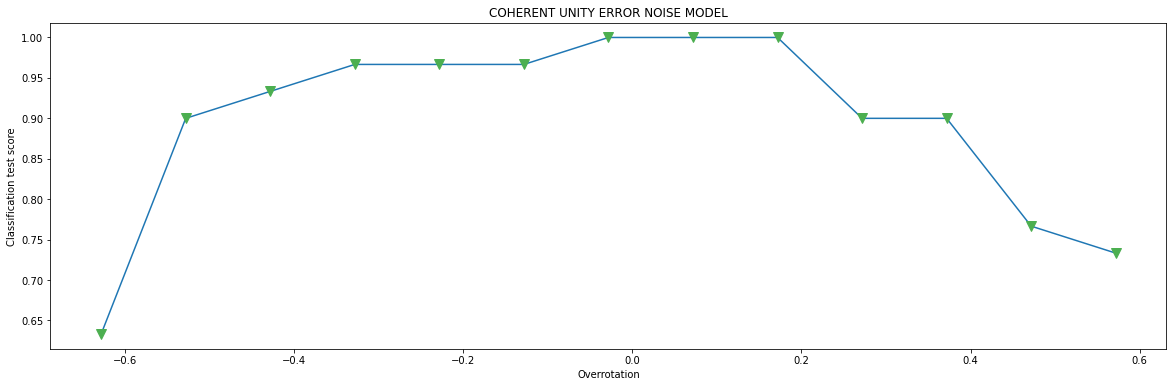

In [ ]:
#Coherent Error plot
plt.figure( figsize=(20, 6))
x3points = np.array(lst_rotation)
y3points = np.array(lst_coherent)
plt.plot(x3points, y3points,marker = 'v', ms = 10, mec = '#4CAF50', mfc = '#4CAF50')
plt.title("COHERENT UNITY ERROR NOISE MODEL")
plt.xlabel("Overrotation")
plt.ylabel("Classification test score")
plt.show()


##CONCLUSION
1-From the first figure we see that
   .depolarizng error is best as it has svc score 1 in most of the probabilities while svc score decreases when probability is increased
   .Pauli error(gate prob. varied) is also not showing as good accuracy when compared to depolarizing error
   .Pauli error(measured prob.varied) is least accurate
2-coherent error is also showing good accuracy when epsilon value is less but its accuracy decreases when epsilon is significantly decreased or increased




##MEASUREMENT ERROR MITIGATION
We are mitagating paul error in the below case and plotting the change in accuracy

In [ ]:
#The following function complete_meas_cal returns a list meas_calibs of QuantumCircuit objects containing the calibration circuits, and a list state_labels of the calibration state labels
meas_calibs, state_labels = complete_meas_cal( qr=feature_map.num_qubits, circlabel='mcal')

In [ ]:
state_labels

['0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111']

##COMPUTING CALIBRATION MATRIX


In [ ]:
# Execute the calibration circuits without noise
backend = qiskit.Aer.get_backend('qasm_simulator')
job = qiskit.execute(meas_calibs, backend=backend, shots=1000)
cal_results = job.result()

In [ ]:
# The calibration matrix without noise is the identity matrix
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
print(meas_fitter.cal_matrix)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# Execute the calibration circuits(with noise-pauli error)
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

backend2 = qiskit.Aer.get_backend('qasm_simulator')
job = qiskit.execute(meas_calibs, backend=backend2,shots=1000,noise_model=noise_bit_flip)
cal_results = job.result()



In [ ]:
# Calculate the calibration matrix with the noise model
meas_fitter = CompleteMeasFitter(cal_results, state_labels,circlabel='mcal')
print(meas_fitter.cal_matrix)

[[0.679 0.071 0.072 0.011 0.074 0.01  0.014 0.001 0.079 0.008 0.009 0.002
  0.011 0.    0.    0.   ]
 [0.06  0.661 0.01  0.073 0.005 0.072 0.002 0.009 0.007 0.078 0.001 0.01
  0.001 0.011 0.    0.001]
 [0.069 0.003 0.65  0.069 0.004 0.    0.066 0.007 0.01  0.    0.064 0.004
  0.001 0.    0.011 0.   ]
 [0.008 0.067 0.065 0.664 0.001 0.004 0.008 0.065 0.002 0.011 0.003 0.08
  0.    0.002 0.001 0.006]
 [0.078 0.009 0.007 0.    0.68  0.089 0.073 0.01  0.006 0.001 0.    0.
  0.053 0.012 0.012 0.002]
 [0.011 0.072 0.    0.006 0.063 0.66  0.006 0.071 0.001 0.009 0.    0.001
  0.012 0.074 0.001 0.008]
 [0.005 0.003 0.076 0.011 0.07  0.007 0.653 0.068 0.002 0.    0.005 0.
  0.005 0.001 0.075 0.005]
 [0.002 0.008 0.006 0.079 0.01  0.064 0.066 0.652 0.001 0.    0.    0.008
  0.    0.01  0.01  0.071]
 [0.071 0.007 0.008 0.003 0.009 0.    0.002 0.    0.64  0.08  0.071 0.006
  0.059 0.005 0.008 0.001]
 [0.002 0.081 0.001 0.008 0.    0.008 0.    0.001 0.078 0.618 0.006 0.056
  0.005 0.065 0.    0.011

In [ ]:
# What is the measurement fidelity?
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())


Average Measurement Fidelity: 0.659563


In [ ]:
#constructing circuit from kernel
feature_map=ZFeatureMap(feature_dimension=4, reps=1)
backend2 = QuantumInstance(qiskit.Aer.get_backend("qasm_simulator"), shots=1024,basis_gates=basis_gates, noise_model=noise_bit_flip1)

kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend2)
z=kernel.construct_circuit(X_train[0])


In [ ]:
#Getting raw data
job = qiskit.execute([z], backend=backend, shots=5000, noise_model=noise_bit_flip)
results = job.result()
raw_counts=results.get_counts()

In [ ]:
#Getting mitigated results
# Get the filter object
meas_filter = meas_fitter.filter
mitigated_results = meas_filter.apply(results)
mitigated_counts = mitigated_results.get_counts(0)

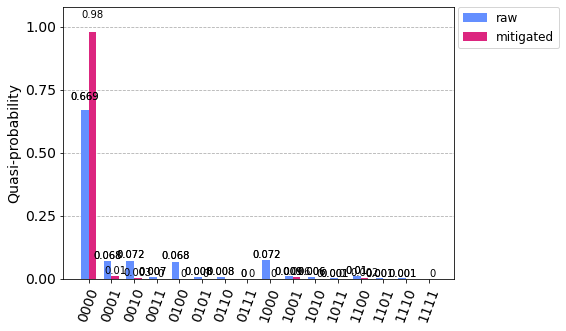

In [ ]:
#comaparison of raw data vs mitigated data
from qiskit.tools.visualization import *
plot_histogram([raw_counts, mitigated_counts], legend=['raw', 'mitigated'])